# Notebook pour la visualisation des coraux selon leur position
Installation de :
- jupyter-lab
- sklearn
- pandas
- geopandas
- matplotlib
- numpy


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.cluster import DBSCAN
import numpy as np 
import pandas as pd


# Lecture des données + planisphère

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
coraux = gpd.read_file('../data/out/coraux_geo.geojson')

In [15]:
print(coraux.head())
if 'ScientificName' not in coraux.keys():
    coraux['ScientificName'] = coraux['species'] # Pour ne pas changer toute la suite du code

   CatalogNumber            species   VernacularNameCategory TaxonRank  \
0         625366  Madrepora oculata  stony coral (branching)   species   
1         625373  Madrepora oculata  stony coral (branching)   species   
2         625386  Madrepora oculata  stony coral (branching)   species   
3         625382  Madrepora oculata  stony coral (branching)   species   
4         625384  Madrepora oculata  stony coral (branching)   species   

   latitude  longitude  DepthInMeters  \
0  18.30817 -158.45392            959   
1  18.30864 -158.45393            953   
2  18.30877 -158.45384            955   
3  18.30875 -158.45384            955   
4  18.30902 -158.45425            968   

                                   Locality   kingdom    phylum  \
0  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
1  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
2  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
3  Hawaiian Archipelago, Swordfish Seamo

# Affiche tous les coraux sur un planisphère
1 couleur == 1 type de corail

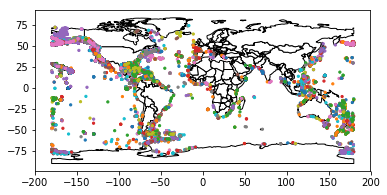

In [4]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
base = world.plot(ax=ax, color='white', edgecolor='black')
coraux.plot(ax=ax, marker='o', markersize=5, column="ScientificName")
plt.show();

# Description des données des coraux

In [5]:
print(coraux.head())
nb_coraux_unique = len(coraux.ScientificName.unique())
print("\n Le nombre de coraux est de {} pour {} espèces".format(len(coraux.ScientificName), nb_coraux_unique))
print("\n La répartition est :\n{}".format(coraux.ScientificName.value_counts()))


   CatalogNumber            species   VernacularNameCategory TaxonRank  \
0         625366  Madrepora oculata  stony coral (branching)   species   
1         625373  Madrepora oculata  stony coral (branching)   species   
2         625386  Madrepora oculata  stony coral (branching)   species   
3         625382  Madrepora oculata  stony coral (branching)   species   
4         625384  Madrepora oculata  stony coral (branching)   species   

   latitude  longitude  DepthInMeters  \
0  18.30817 -158.45392            959   
1  18.30864 -158.45393            953   
2  18.30877 -158.45384            955   
3  18.30875 -158.45384            955   
4  18.30902 -158.45425            968   

                                   Locality   kingdom    phylum  \
0  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
1  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
2  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
3  Hawaiian Archipelago, Swordfish Seamo

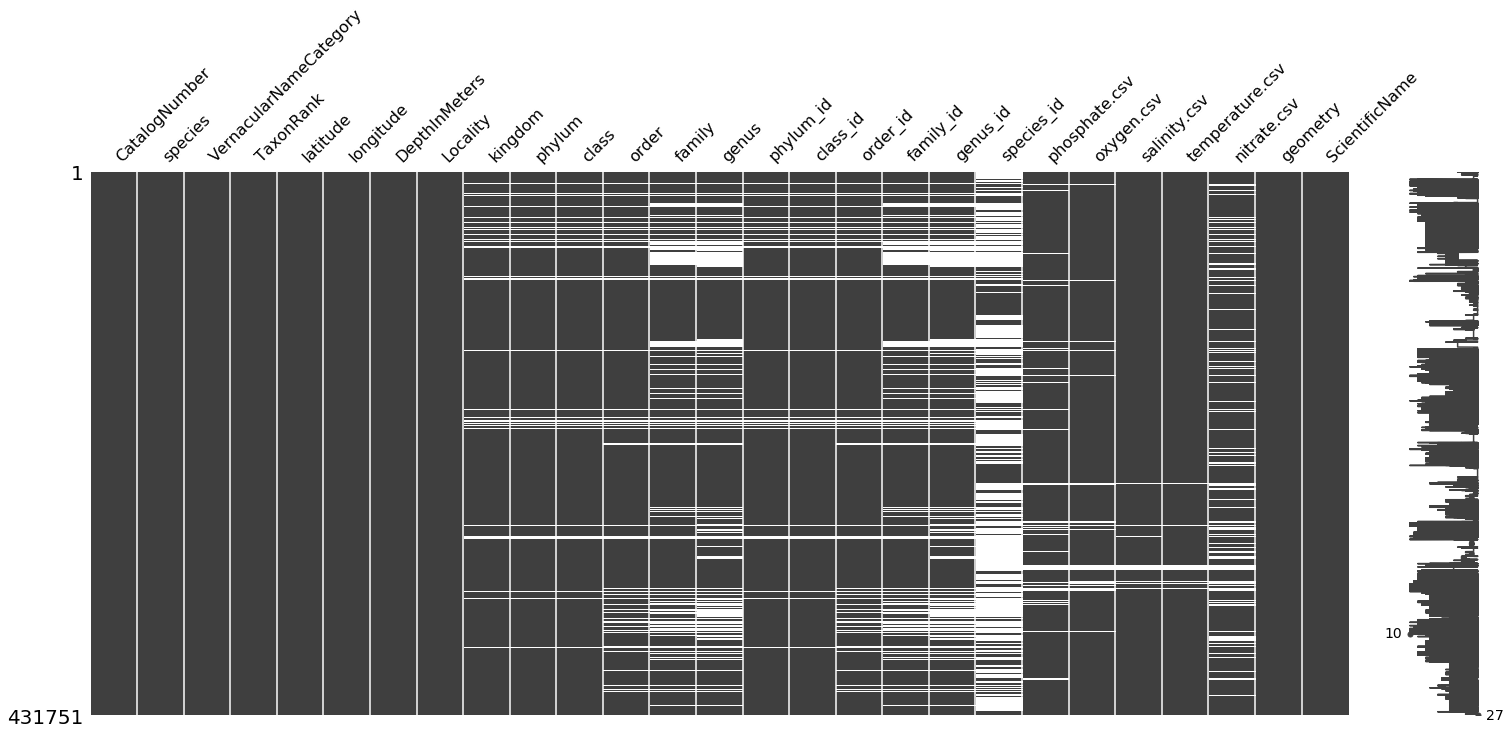

In [6]:
import missingno as msn
# coraux.info()
# coraux.describe()
msn.matrix(coraux)

In [7]:
print("Len Tab duplicate {}".format(len(coraux)))
column_dupli =["ScientificName", "longitude", "latitude", "phosphate.csv" , "oxygen.csv", "salinity.csv", "temperature.csv","nitrate.csv"]
print(coraux.head())
coraux_drop = coraux.drop_duplicates(subset=column_dupli)
print("Len Tab without duplicate {}".format(len(coraux_drop)))
coraux_drop.head()

Len Tab duplicate 431751
   CatalogNumber            species   VernacularNameCategory TaxonRank  \
0         625366  Madrepora oculata  stony coral (branching)   species   
1         625373  Madrepora oculata  stony coral (branching)   species   
2         625386  Madrepora oculata  stony coral (branching)   species   
3         625382  Madrepora oculata  stony coral (branching)   species   
4         625384  Madrepora oculata  stony coral (branching)   species   

   latitude  longitude  DepthInMeters  \
0  18.30817 -158.45392            959   
1  18.30864 -158.45393            953   
2  18.30877 -158.45384            955   
3  18.30875 -158.45384            955   
4  18.30902 -158.45425            968   

                                   Locality   kingdom    phylum  \
0  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
1  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
2  Hawaiian Archipelago, Swordfish Seamount  Animalia  Cnidaria   
3  Hawaiian Arc

,CatalogNumber,species,VernacularNameCategory,TaxonRank,latitude,longitude,DepthInMeters,Locality,kingdom,phylum,...,family_id,genus_id,species_id,phosphate.csv,oxygen.csv,salinity.csv,temperature.csv,nitrate.csv,geometry,ScientificName
0,625366,Madrepora oculata,stony coral (branching),species,18.30817,-158.45392,959,"Hawaiian Archipelago, Swordfish Seamount",Animalia,Cnidaria,...,135078,135123,135209,3.141286,1.066357,34.514391,4.363131,NaN,POINT (-158.45392 18.30817),Madrepora oculata
1,625373,Madrepora oculata,stony coral (branching),species,18.30864,-158.45393,953,"Hawaiian Archipelago, Swordfish Seamount",Animalia,Cnidaria,...,135078,135123,135209,3.141286,1.066357,34.514391,4.363131,NaN,POINT (-158.45393 18.30864),Madrepora oculata
2,625386,Madrepora oculata,stony coral (branching),species,18.30877,-158.45384,955,"Hawaiian Archipelago, Swordfish Seamount",Animalia,Cnidaria,...,135078,135123,135209,3.141286,1.066357,34.514391,4.363131,NaN,POINT (-158.45384 18.30877),Madrepora oculata
3,625382,Madrepora oculata,stony coral (branching),species,18.30875,-158.45384,955,"Hawaiian Archipelago, Swordfish Seamount",Animalia,Cnidaria,...,135078,135123,135209,3.141286,1.066357,34.514391,4.363131,NaN,POINT (-158.45384 18.30875),Madrepora oculata
4,625384,Madrepora oculata,stony coral (branching),species,18.30902,-158.45425,968,"Hawaiian Archipelago, Swordfish Seamount",Animalia,Cnidaria,...,135078,135123,135209,3.141286,1.066357,34.514391,4.363131,NaN,POINT (-158.45425 18.30902),Madrepora oculata


In [8]:
### Checke si les données sont variées
column_dupli =["ScientificName", "phosphate.csv" , "oxygen.csv", "salinity.csv", "temperature.csv","nitrate.csv"]
df_stat = coraux.groupby(column_dupli, as_index=False).size().reset_index().rename(columns={0:'count'}).sort_values(by="count", ascending=False)
print(df_stat.head(20))


print("Nb data with Nitrate with Nan {}".format(len(coraux[coraux['nitrate.csv'].isnull()])))
print("Nb data with Phosphate with Nan {}".format(len(coraux[coraux['phosphate.csv'].isnull()])))
print("Nb data with Oxygen with Nan {}".format(len(coraux[coraux['oxygen.csv'].isnull()])))
print("Nb data with Salinity with Nan {}".format(len(coraux[coraux['salinity.csv'].isnull()])))
print("Nb data with Temperature with Nan {}".format(len(coraux[coraux['temperature.csv'].isnull()])))

print("Nb data with Nan {}".format(len(coraux[coraux.isnull().any(axis=1)])))
print("Nb data {}".format(len(coraux)))
coraux.head()

grouped_duplicate = coraux[coraux.duplicated(column_dupli) == True] #.sort_values(by=column_dupli, ascending=[True, False, False, False, False, False]) #.groupby("ScientificName")
grouped_duplicate.head(100)
print("len duplicate {}".format(len(grouped_duplicate)))


              ScientificName  phosphate.csv  oxygen.csv  salinity.csv  \
7922     Calcigorgia beringi       1.627683    4.693200     32.852651   
28766        Latrunculia sp.       1.627683    4.693200     32.852651   
30305       Lophelia pertusa       1.697917    2.767667     35.081547   
18048         Funiculina sp.       3.145250    0.514000     34.415243   
46113          Stylaster sp.       2.533250    2.035750     33.954014   
30323       Lophelia pertusa       1.774000    2.846600     35.010892   
30312       Lophelia pertusa       1.731636    2.825417     35.034494   
30297       Lophelia pertusa       1.676500    2.763286     35.109985   
29120  Leiopathes glaberrima       1.697917    2.767667     35.081547   
1158       Acanthoptilum sp.       1.554167    4.336708     33.545092   
43919     Staurocalyptus sp.       3.212444    0.916214     34.528948   
51897     Umbellula lindahli       3.145250    0.514000     34.415243   
46133          Stylaster sp.       2.586250    1.88

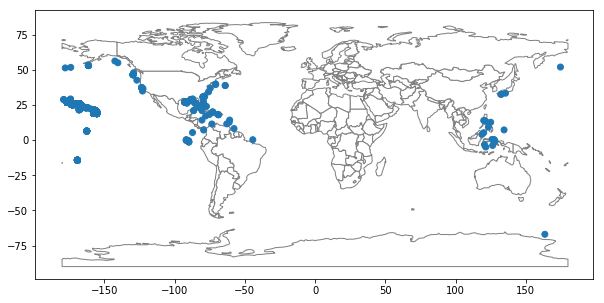

In [9]:
#Affiche le type de coraux indiqué dans type_coraux_to_show
fig, ax = plt.subplots(figsize=[10, 6])
type_coraux_to_show = ["Chrysogorgia sp."] #, "Lophelia pertusa", "Calcigorgia beringi", "Latrunculia sp."]
ax.set_aspect('equal')
base = world.plot(ax=ax, color='white', edgecolor='grey')

coraux[coraux['ScientificName'].isin(type_coraux_to_show) == True].plot(ax=base, column="ScientificName");


# Regroupe les données selon leur position
- Ne garde que les n coraux qui ont un nombre max de d'échantillons
- Juste pour tester des fonctions et réduire les temps de calcul

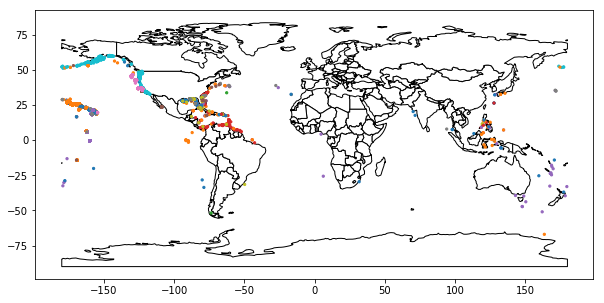

In [10]:
fig, ax = plt.subplots(figsize=[10, 6])
ax.set_aspect('equal')
# coraux.ScientificName.value_counts().keys().tolist() #keys
# coraux.ScientificName.value_counts().tolist() ## value
counts = coraux['ScientificName'].value_counts()

nb_de_data_max = 1000
nb_coraux_filtres = 10
coraux_filtres = coraux[coraux['ScientificName'].isin(counts[counts <nb_de_data_max].index[:nb_coraux_filtres])]
base = world.plot(ax=ax, color='white', edgecolor='black')
coraux_filtres.plot(ax=ax, marker='o', markersize=5, column="ScientificName")
#ax.set_title('Coraux filtrés: les {} coraux contenant max {} positions'.format(nb_coraux_filtres, nb_de_data_max))
plt.show();

# Regroupe les positions par coraux selon leur densité 

In [11]:
coords = coraux_filtres.as_matrix(columns=['latitude', 'longitude'])
kms_per_radian = 6371.0088
epsilon = 1000 / kms_per_radian #
db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords)) 
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))


/home/elodiedellier/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Number of clusters: 9


/home/elodiedellier/.local/lib/python2.7/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/home/elodiedellier/.local/lib/python2.7/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


(0, (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0), 0)
(1, (0.8662821991541715, 0.2901191849288735, 0.2978085351787774, 1.0), 0)
(2, (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0), 0)
(3, (0.9951557093425606, 0.8322952710495963, 0.5063437139561706, 1.0), 0)
(4, (0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0), 9)
(5, (0.8384467512495197, 0.9349480968858133, 0.6089965397923875, 1.0), 3)
(6, (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0), 0)
(7, (0.24006151480199925, 0.58239138792772, 0.7208765859284891, 1.0), 0)
(-1, [0, 0, 0, 1], 52)


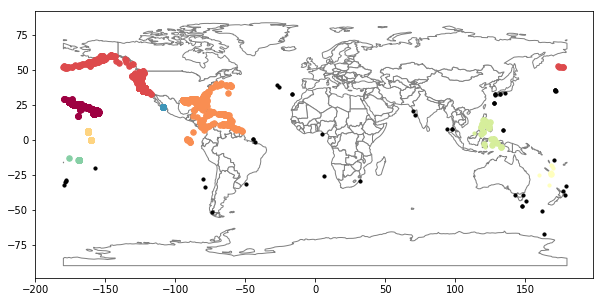

In [12]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
labels = cluster_labels
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig, ax = plt.subplots(figsize=[10, 6])
base = world.plot(ax=ax, color='white', edgecolor='gray')
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = coraux_filtres[class_member_mask & core_samples_mask]
    xy.plot(ax=ax, marker='o',color=col, markersize=30, column="ScientificName")
    xy = coraux_filtres[class_member_mask & ~core_samples_mask]
    xy.plot(ax=ax, marker='o',color=col, markersize=10, column="ScientificName")
    print(k, col, len(xy))
plt.show()   

# Regroupe les positions par coraux selon leur densité selon l'espèce
1 couleur == 1 région contenant une densité de coraux satisfaisantes

Number of clusters: Antipathes sp. 4 set([0, 1, 2, -1])
	Antipathes sp. 0 81 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Antipathes sp. 1 364 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0)
	Antipathes sp. 2 367 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0)
	Antipathes sp. -1 23 [0, 0, 0, 1]


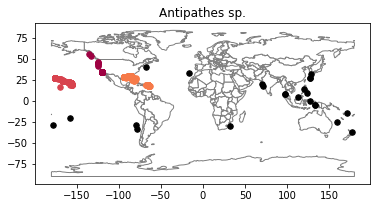

Number of clusters: Chrysogorgia sp. 7 set([0, 1, 2, 3, 4, 5, -1])
	Chrysogorgia sp. 0 818 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Chrysogorgia sp. 1 88 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0)
	Chrysogorgia sp. 2 12 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0)
	Chrysogorgia sp. 3 23 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0)
	Chrysogorgia sp. 4 15 (0.9977700884275279, 0.930872741253364, 0.6330642060745867, 1.0)
	Chrysogorgia sp. 5 24 (0.944252210688197, 0.9777008842752788, 0.6620530565167244, 1.0)
	Chrysogorgia sp. -1 6 [0, 0, 0, 1]


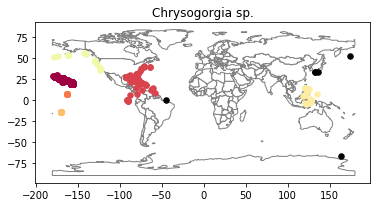

Number of clusters: Desmophyllum sp. 2 set([0, -1])
	Desmophyllum sp. 0 845 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Desmophyllum sp. -1 8 [0, 0, 0, 1]


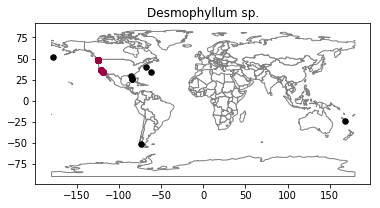

Number of clusters: Ellisella sp. 2 set([0, -1])
	Ellisella sp. 0 920 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Ellisella sp. -1 6 [0, 0, 0, 1]


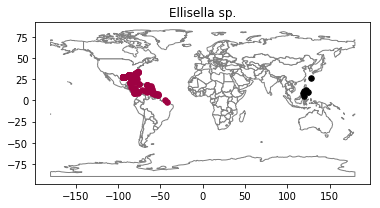

Number of clusters: Enallopsammia rostrata 4 set([0, 1, 2, -1])
	Enallopsammia rostrata 0 948 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Enallopsammia rostrata 1 13 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0)
	Enallopsammia rostrata 2 10 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0)
	Enallopsammia rostrata -1 27 [0, 0, 0, 1]


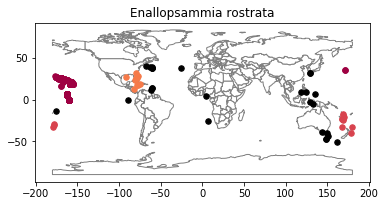

Number of clusters: Euplectellidae 5 set([0, 1, 2, 3, -1])
	Euplectellidae 0 13 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Euplectellidae 1 30 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0)
	Euplectellidae 2 873 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0)
	Euplectellidae 3 24 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0)
	Euplectellidae -1 2 [0, 0, 0, 1]


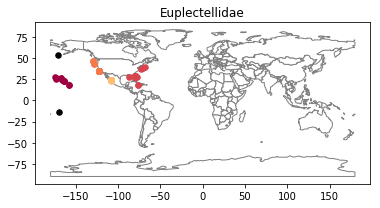

Number of clusters: Farrea truncata 2 set([0, -1])
	Farrea truncata 0 869 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Farrea truncata -1 4 [0, 0, 0, 1]


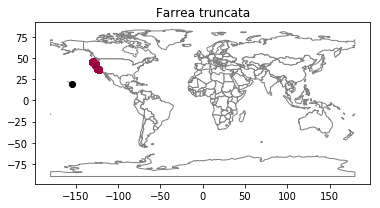

Number of clusters: Leiopathes sp. 3 set([0, 1, -1])
	Leiopathes sp. 0 331 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Leiopathes sp. 1 581 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0)
	Leiopathes sp. -1 3 [0, 0, 0, 1]


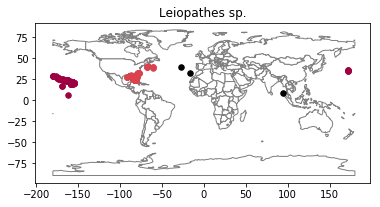

Number of clusters: Nicella sp. 2 set([0, -1])
	Nicella sp. 0 833 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
	Nicella sp. -1 3 [0, 0, 0, 1]


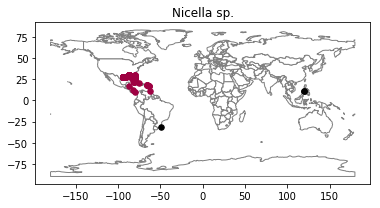

Number of clusters: Ptilosarcus gurneyi 1 set([0])
	Ptilosarcus gurneyi 0 887 (0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)


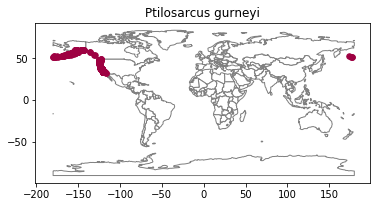

10


In [13]:
grouped = coraux_filtres.groupby('ScientificName')


nb=0
for name, group in grouped:
    coords = group[['latitude', 'longitude']] 
    kms_per_radian = 6371.0088
    epsilon = 1500 / kms_per_radian #1.5
    db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords)) 
    cluster_labels = db.labels_
    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
    
    
    if not(num_clusters == 1 and set(cluster_labels) == set([-1])):
        print('Number of clusters: {} {} {}'.format(name, num_clusters, set(cluster_labels)))
        # Affiche le résultat
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True

        # Black removed and is used for noise instead.
        labels = cluster_labels
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, nb_coraux_filtres)]
        fig, ax = plt.subplots()#figsize=[10, 6])
        base = world.plot(ax=ax, color='white', edgecolor='gray')
        for k, col in zip(unique_labels, colors):
            col = [0, 0, 0, 1] if k == -1 else col
            class_member_mask = (labels == k)
            xy = group[(class_member_mask & core_samples_mask) | (class_member_mask & ~core_samples_mask)]
            #print(xy.head())
            print('\t{} {} {} {}'.format(name, k, len(xy), col))
            if len(xy) > 0:
                xy.plot(ax=ax, marker='o', color=col, markersize=30)#, column="ScientificName")
                ax.set_title('{}'.format(name))
        plt.show() 
        nb = nb+1
    
    #print name
print(nb)